# CLEVR-MRT example dataset visualisation

In [7]:
import json
import torch
from skimage.io import imread
import numpy as np

from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

import matplotlib.pyplot as plt
%matplotlib inline

## Extracting dataset

Because the dataset is quite massive, we will play around with a small sample of it here. Download [clevr-mrt-v2-sample.tar.gz](https://drive.google.com/file/d/1uoHllf0lPmRI1bGGGo6I3w8oj26xswaA/view?usp=share_link) from and extract its contents.

In [1]:
%%bash 
tar -xvzf clevr-mrt-v2-sample.tar.gz >/dev/null 2>&1

In [2]:
%%bash
ls -lt clevr-mrt-v2-sample/

total 0
drwxr-xr-x 2 toolkit toolkit 0 Dec 25  2021 metadata
drwxr-xr-x 4 toolkit toolkit 0 Dec 25  2021 train-val


When we extract the folder, we will see three directories: `train-val` and `metadata` (for the full dataset, there will also be a held-out test set called `test`). The `train-val` directory consists of many subfolders that are identified by indices. Essentially, each subfolder is a batch of scenes and questions, and all of the indices together comprise the entire dataset.

In [3]:
%%bash
ls -lt clevr-mrt-v2-sample/train-val

total 0
drwxr-xr-x 4 toolkit toolkit 0 Dec 25  2021 217
drwxr-xr-x 4 toolkit toolkit 0 Dec 25  2021 120


Examining one of these indices will look familiar if you've played with the original Clevr dataset:

In [4]:
%%bash
ls clevr-mrt-v2-sample/train-val/217

images
questions.json
scenes
scenes.json


In [5]:
DATADIR="clevr-mrt-v2-sample/train-val/"

-----

## Scenes

Let's read in the scenes.json of these indices.

In [8]:
scenes = json.loads(open("clevr-mrt-v2-sample/train-val/217/scenes.json").read())
#print(scenes.keys())
len(scenes['scenes']) # there are 100 scenes per index

100

In [9]:
scenes.keys()

dict_keys(['scenes', 'info'])

Each scene consists of 20 cameras, randomly sampled in a 360 degree arc. `cc` refers to the 'canonical camera', which is what the corresponding questions (in `questions.json`) are posed with respect to.

In [10]:
scenes['scenes'][0].keys()

dict_keys(['cam16', 'cam0', 'cam2', 'cam1', 'cam18', 'cam7', 'cam12', 'cam9', 'cam19', 'cam17', 'cc', 'cam15', 'cam4', 'cam10', 'cam13', 'cam3', 'cam5', 'cam6', 'cam11', 'cam8', 'cam14'])

Let us visualise a random subset (16) of these cameras.

In [11]:
cam_names = list(scenes['scenes'][0].keys())
np.random.shuffle(cam_names)

In [12]:
cam_names_subset = list(cam_names)[0:16]
cam_names_subset

['cam17',
 'cam10',
 'cam19',
 'cam1',
 'cc',
 'cam3',
 'cam15',
 'cam6',
 'cam12',
 'cam4',
 'cam14',
 'cam2',
 'cam16',
 'cam7',
 'cam13',
 'cam8']

In [13]:
scenes['scenes'][0][ cam_names_subset[0] ]['image_filename']

'CLEVR_train-clevr-kiwi-spatial_s021700_cam17.png'

We can see that image filenames are of the form `CLEVR_train-clevr-kiwi-spatial_sX_Y.jpg`, where X is a unique scene identifier and Y denotes the camera number. If Y is `cc`, this means it is the canonical camera (the viewpoint which questions are posed with respect to).

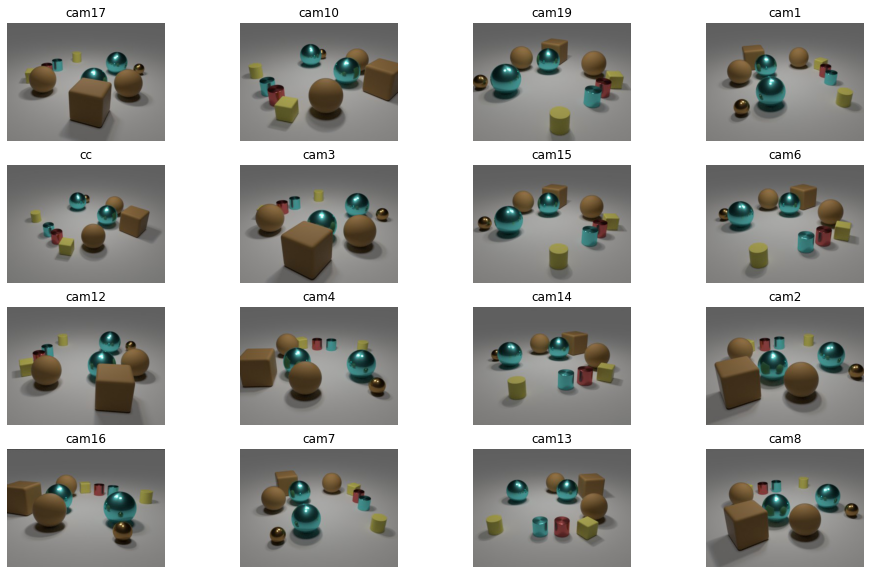

In [14]:
plt.figure(figsize=(16,10))
plt.tight_layout()
for j in range(16):
    plt.subplot(4,4,j+1)
    img = imread("clevr-mrt-v2-sample/train-val/217/images/%s" % \
                 scenes['scenes'][0][ cam_names_subset[j] ]['image_filename'].replace(".png",".jpg"))
    plt.imshow(img)
    plt.axis('off')
    plt.title(cam_names_subset[j])

### Canonical camera ('cc')

Here is the canonical camera. While the canonical camera is fixed to the same position (i.e. same world 3d coordinates) for every scene in the dataset, in principle it should not be able to be easily determined by eyeballing the images, since we made an effort to ensure that there were no landmarks in the dataset (e.g. directional lighting).

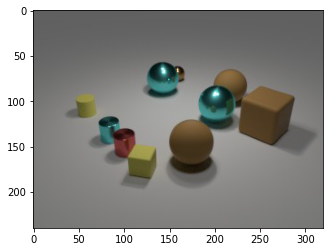

In [15]:
img_canonical = imread("clevr-mrt-v2-sample/train-val/217/images/%s" % \
                 scenes['scenes'][0]['cc']['image_filename'].replace(".png",".jpg"))
plt.imshow(img_canonical)

-----

## Questions

In [16]:
questions = json.loads(open("{}/217/questions.json".format(DATADIR)).read())
questions.keys()

dict_keys(['info', 'questions'])

In [17]:
q1 = questions['questions'][0]
q1['question']

'Are there the same number of large brown balls in front of the yellow rubber cylinder and small green rubber cubes?'

In [18]:
q1['answer']

False

In [19]:
q1['image_filename']

'CLEVR_train-clevr-kiwi-spatial_s021700_cc.png'

In [20]:
for question in questions['questions']:
    if "CLEVR_train-clevr-kiwi-spatial_s021700" in question['image_filename']:
        print("Q:", question['question'])
        print("  A:", question['answer'])

Q: Are there the same number of large brown balls in front of the yellow rubber cylinder and small green rubber cubes?
  A: False
Q: Is the number of big brown objects that are behind the tiny metal ball less than the number of small cubes?
  A: True
Q: Are there more large brown matte things that are in front of the tiny red metal cylinder than matte cubes?
  A: False
Q: Are there an equal number of tiny yellow things that are in front of the small cube and tiny cyan shiny things that are to the right of the small brown sphere?
  A: True
Q: Are there fewer small metal cylinders behind the small red object than brown cubes on the left side of the tiny metallic sphere?
  A: False
Q: Is the number of yellow matte cubes that are behind the small red cylinder greater than the number of yellow blocks that are in front of the large brown cube?
  A: False
Q: There is a brown ball that is in front of the yellow cylinder; is it the same size as the tiny yellow block?
  A: False
Q: There is a ye